<a href="https://colab.research.google.com/github/TanayY/Data-Science/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Linear Regression Assignment/day.csv")

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can observe from the above info that all values are non-null


## Data Cleaning

In [ ]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

# df.yr = df.yr.map({0:'2018',1:'2019'})

## Univariate Analysis

In [ ]:
# instant
# This variable just marks the index and is not useful for our analysis
# Therefore we will be dropping this

df.drop(columns= ['instant'], inplace=True, axis= 0)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#dteday
# This column indicates the date
# All values are non-null and consists records of all days from start of the year 2018 till end of the year 2019

In [ ]:
# season
# This consists of the four seasons
# 1. Spring
# 2. Summer
# 3. Fall
# 4. Winter

# Let's check if any other values exist beside 1-4
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [ ]:
# No other values exist besides 1-4

In [ ]:
# yr
# 0 - 2018
# 1 - 2019

# Let's check if any other values exist beside 0 or 1
df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [ ]:
# No other values exist beside 0 or 1
# 365 days of 2018 and 365 days of 2019

In [ ]:
# mnth
# values from 1 to 12
df.mnth.value_counts()

jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: mnth, dtype: int64

In [ ]:
# holiday
# whether the day is a holiday or not

df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [ ]:
# This tells us that out of 730 days only 21 days are holidays
# Holidays does not include weekend

In [ ]:
# weekday
# Tells us what day of the week it is

df.weekday.value_counts()

mon    105
tue    105
wed    104
thu    104
fri    104
sat    104
sun    104
Name: weekday, dtype: int64

In [ ]:
# 0 is a Sunday and so on so forth

In [ ]:
# working day
# if day is neither weekend nor holiday is 1, otherwise is 0.

df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [ ]:
# There are about 504 working days and 226 non-working days
# The 226 non-working days include weekends and holidays
# Out of the 226 non-working days 21 are holidays and 205 are weekends

In [ ]:
# weathersit
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

df.weathersit.value_counts()

Clear             463
Misty             246
Light_snowrain     21
Name: weathersit, dtype: int64

In [ ]:
# This tells us that most of the days were in the category of 1- Clear to Partly Cloudy
# A few days fall into the second category
# And there were almost very few days in the third category
# There were no days with heavy rainfall or thunderstorms

In [ ]:
#temp
# temperature in Celsius on that particular day
# Variable feature
df.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [ ]:
# This tells us that
# - the min temp was 2.4 degress
# - the max temp was 35.32 degress
# - the avg temp throught the course of two years was 20.31 degrees

<Axes: >

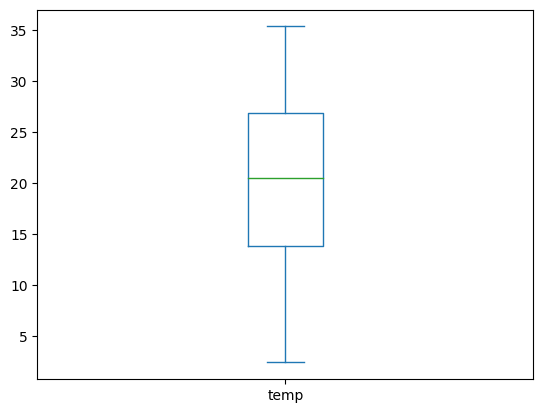

In [ ]:
# Let us check for outliers in this case
df.temp.plot.box()

In [ ]:
# There seem to be no outliers in this case
# and there are no missing values as well

In [ ]:
#atemp
# feeling temperature in Celsius

df.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

In [ ]:
# This tells us that
# - the min temp was 3.95 degress
# - the max temp was 42.04 degress
# - the avg temp throught the course of two years was 23.72 degrees

<Axes: >

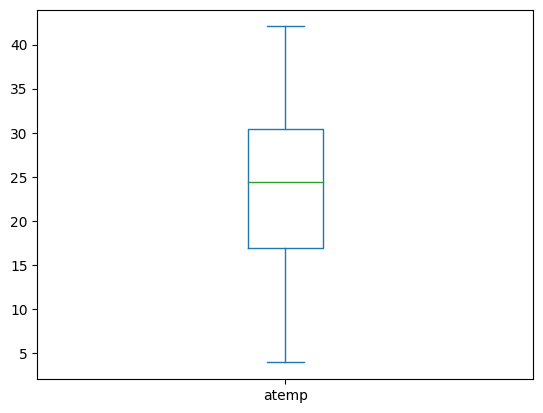

In [ ]:
# Let us check for outliers in this case
df.atemp.plot.box()

In [ ]:
# There seem to be no outliers in this case as well
# and there are no missing values as well

In [ ]:
# hum
# humidity

df.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [ ]:
# This tells us that
# - min humidity is 0
# - max humidity is 97.25
# - avg humidity is 63.76 throught the course of two years

<Axes: >

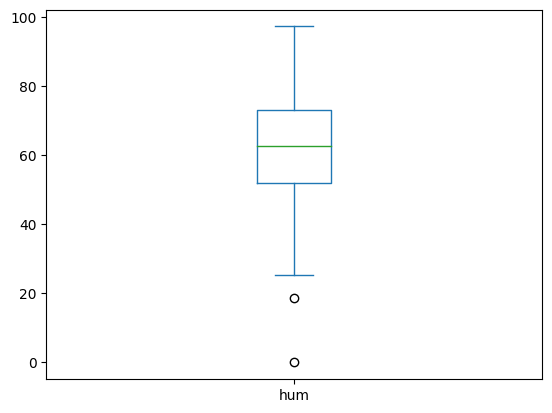

In [ ]:
df.hum.plot.box()

In [ ]:
# There seem to be two outliers <=20 and >=0
# Let's check the count of these and see if these outliers are useful or affect our analysis

df.loc[(df.hum <= 25) & (df.hum>=0)]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,19-02-2018,spring,0,feb,0,mon,1,Clear,16.365847,19.5702,18.7917,34.000021,532,1103,1635
68,10-03-2018,spring,0,mar,0,sat,0,Light_snowrain,15.952731,19.2834,0.0000,17.545759,46,577,623


In [ ]:
# To have 0 humidity in any condition is impossible
# Also given that the temperature is 15.95 and the feeling temp is 19.28, it is impossible to have 0 humidity
# Therefore we will be dropping this one row

In [ ]:
# We will keep the 1st row with humidity 18.79 as the cnt of users is also good enough and is an acceptable humidity

In [ ]:
df.drop([df.index[68]], inplace=True)

In [ ]:
df.loc[(df.hum <= 25) & (df.hum>=0)]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,19-02-2018,spring,0,feb,0,mon,1,Clear,16.365847,19.5702,18.7917,34.000021,532,1103,1635


In [ ]:
# windspeed
df.windspeed.describe()

count    729.000000
mean      12.757060
std        5.196382
min        1.500244
25%        9.041650
50%       12.125325
75%       15.624936
max       34.000021
Name: windspeed, dtype: float64

In [ ]:
# The above data tells us that:
# - The min windspeed was 1.5
# - The max windspeed was 34.00
# - The avg windspeed was 12.75

<Axes: >

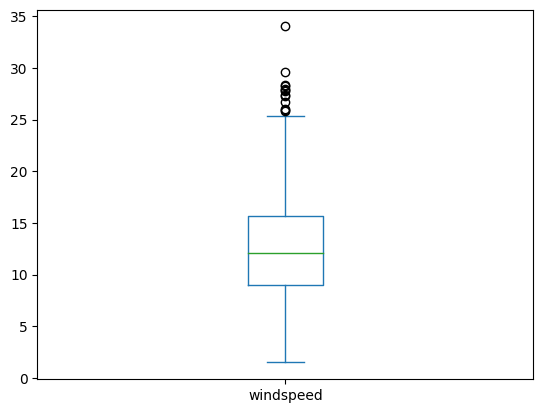

In [ ]:
# Let us check for any outliers
df.windspeed.plot.box()

In [ ]:
# Some of the data points lie in between 25-30
# The one extereme data point lies near 35.
# Let us check the columns having windspeed above 25

df.loc[df.windspeed > 25]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,14-02-2018,spring,0,feb,0,wed,1,Clear,17.015000,19.91750,37.5833,27.999836,208,1705,1913
49,19-02-2018,spring,0,feb,0,mon,1,Clear,16.365847,19.57020,18.7917,34.000021,532,1103,1635
93,04-04-2018,summer,0,apr,0,wed,1,Clear,23.506653,27.14645,42.6250,25.833257,734,2381,3115
94,05-04-2018,summer,0,apr,0,thu,1,Misty,16.980847,19.91750,64.2083,26.000489,167,1628,1795
238,27-08-2018,fall,0,aug,0,mon,1,Misty,27.880000,31.77780,85.0000,25.166339,226,889,1115
292,20-10-2018,winter,0,oct,0,sat,0,Clear,19.509153,23.32625,63.6250,28.292425,471,3724,4195
377,13-01-2019,spring,1,jan,0,sun,0,Clear,11.240847,12.46810,50.7500,25.333236,174,3040,3214
382,18-01-2019,spring,1,jan,0,fri,1,Clear,12.436653,13.76270,44.3333,27.833743,109,3267,3376
407,12-02-2019,spring,1,feb,0,tue,1,Clear,5.227500,5.08290,46.4583,27.417204,73,1456,1529
420,25-02-2019,spring,1,feb,0,mon,1,Clear,11.924153,12.78375,39.5833,28.250014,317,2415,2732


In [ ]:
# There are 17 entries with windspeed more than 25
# The highest windspeed is 34.00 and the entry has a significant number of users using the bike service
# We won't be dropping any rows here

In [ ]:
# casual
# Number of casual users or we can say guest users

df.casual.describe()

count     729.000000
mean      850.351166
std       686.304927
min         2.000000
25%       317.000000
50%       721.000000
75%      1097.000000
max      3410.000000
Name: casual, dtype: float64

In [ ]:
# The above info tells us that:
# - The minimum number of casual users on a particular day are 2
# - The maximum number of casual users on a particular day are 3410

<Axes: >

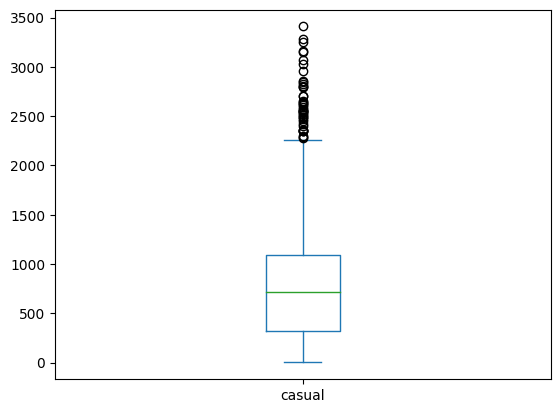

In [ ]:
df.casual.plot.box()

In [ ]:
# Let us analyze users above the 2250 casual user count
df.loc[df['casual'] >= 2250]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
140,21-05-2018,summer,0,may,0,mon,1,Clear,24.702500,28.59875,62.6667,8.083550,2258,3547,5805
148,29-05-2018,summer,0,may,0,tue,1,Clear,27.367500,30.77750,81.8750,14.333846,2355,2433,4788
183,03-07-2018,fall,0,july,0,tue,1,Misty,29.383347,33.42875,68.2500,15.333486,2282,2367,4649
184,04-07-2018,fall,0,july,1,wed,0,Misty,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
196,16-07-2018,fall,0,july,0,mon,1,Clear,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
246,04-09-2018,fall,0,sep,0,tue,1,Clear,29.075847,33.27145,74.2083,13.833289,2521,2419,4940
281,09-10-2018,winter,0,oct,0,tue,1,Clear,22.174153,26.19915,72.7500,4.251150,2397,3114,5511
440,17-03-2019,spring,1,mar,0,sun,0,Misty,21.080847,25.25230,75.5833,7.417168,3155,4681,7836
446,23-03-2019,summer,1,mar,0,sat,0,Misty,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
454,31-03-2019,summer,1,mar,0,sun,0,Misty,17.390847,21.08540,73.8333,16.791339,2301,3934,6235


In [ ]:
# From the above data we can observe that the number of casual users is high but even the number of registered users is high too
# So there is nothing unusal about this data

In [ ]:
# registered
# Total number of registered users

df.registered.describe()

count     729.000000
mean     3662.984911
std      1556.639192
min        20.000000
25%      2506.000000
50%      3667.000000
75%      4790.000000
max      6946.000000
Name: registered, dtype: float64

In [ ]:
# The above data tells us that:
# - The min number of users on a particular day was 20
# - The max number of users on a particular day was 6946

<Axes: >

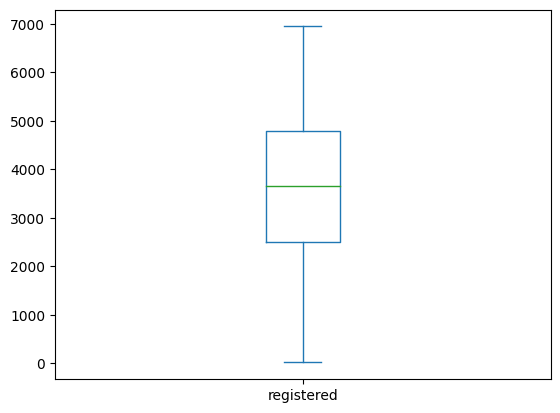

In [ ]:
df.registered.plot.box()

In [ ]:
# cnt
# Total number of registered users

df.cnt.describe()

count     729.000000
mean     4513.336077
std      1931.975331
min        22.000000
25%      3190.000000
50%      4549.000000
75%      5976.000000
max      8714.000000
Name: cnt, dtype: float64

<Axes: >

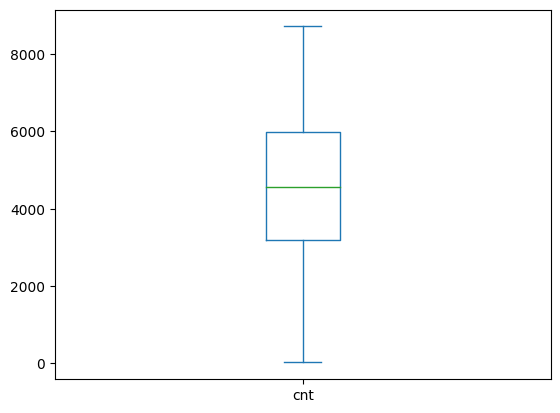

In [ ]:
df.cnt.plot.box()

In [ ]:
# As our target variable is cnt which is the summation of casual and registered, we are not interested in both these features and we can drop them
# Also the dteday or the date on which there were a particualar number of customers are not really related,
# Therefore we can drop that as well
df.drop(columns=["casual", "registered", "dteday"], axis=1, inplace=True)

In [ ]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Bivariate Analysis

In [ ]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

### Numerical vs Numerical


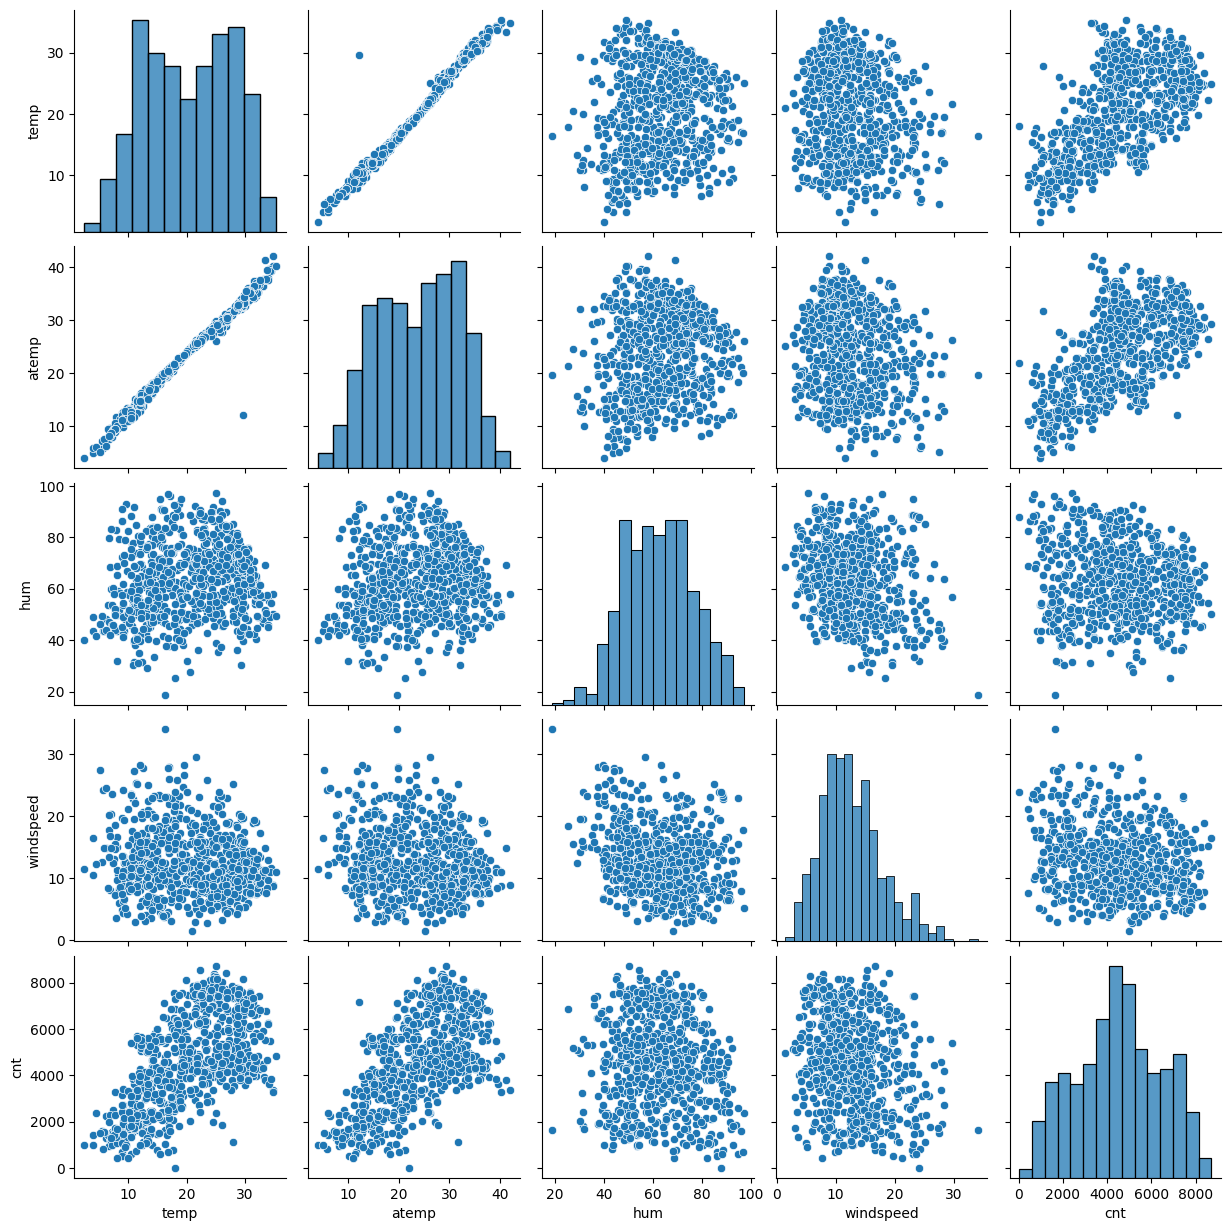

In [ ]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

### Categorical Variables vs Target

In [ ]:
def categorical_columns_plot(col):
    plt.figure(figsize=(8,4))
    sns.barplot(x=col,y='cnt',data=df, hue='yr',palette='pastel')
    # plt.legend(labels=['2018', '2019'])
    # sns.set(xlabel='2018', ylabel='2019')
    plt.show()

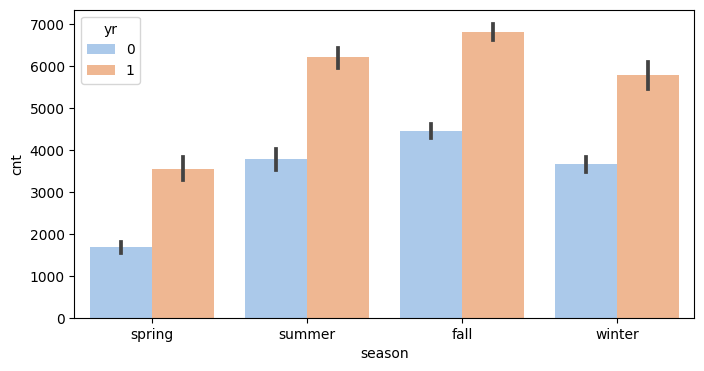

In [ ]:
# plotting visualization for season column

categorical_columns_plot('season')

Fall season(3) has more customers.<br>
For each season the customer count has increased drastically from 2018 to 2019.

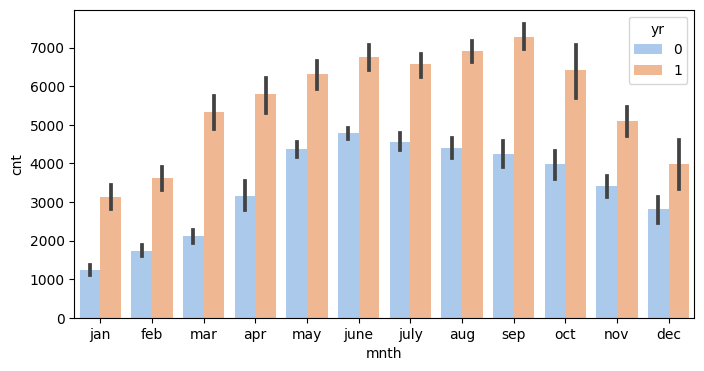

In [ ]:
# plotting visualization for month column

categorical_columns_plot('mnth')

Most usage is done during the month of may, june, july, aug, sep and oct.<br>
Trend follows a normal curve distrbution, where the count increases at first and gradually decreases by the end.<br>
Number of users for each month seems to have increased from 2018 to 2019.

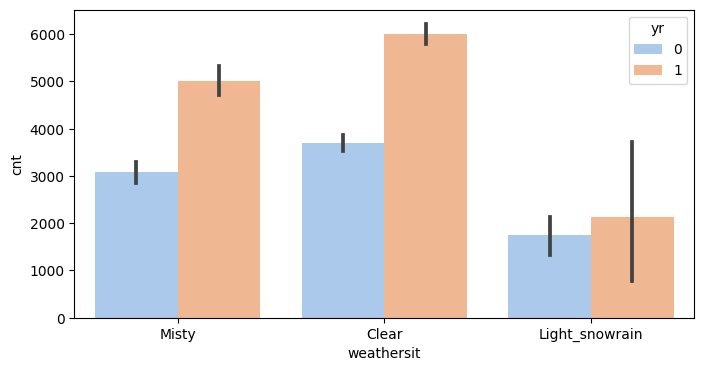

In [ ]:
# plotting visualization for weathersit column

categorical_columns_plot('weathersit')

More users tend to use the service when there is clear weather(1)

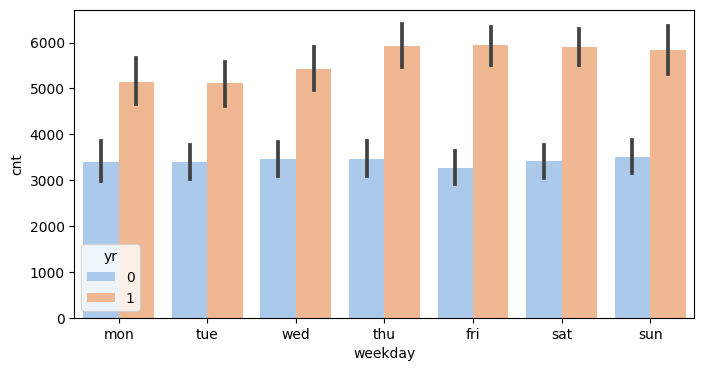

In [ ]:
# plotting visualization for weekday column

categorical_columns_plot('weekday')

Thusrday to Sunday have more number of users as compared to the start of the week.

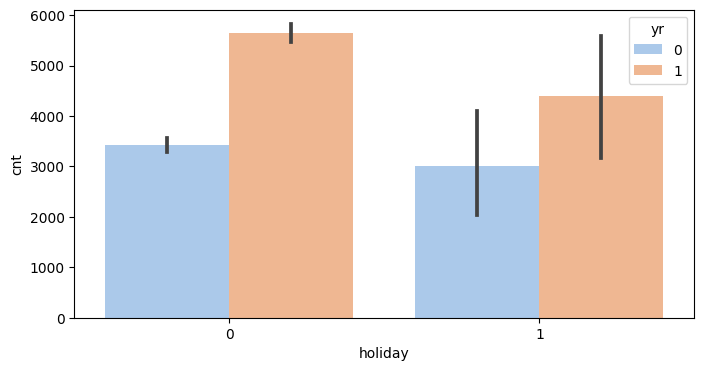

In [ ]:
# plotting visualization for holiday column

categorical_columns_plot('holiday')

Number of users is directly related to Holidays<br>
When its not holiday, booking seems to be less in number.

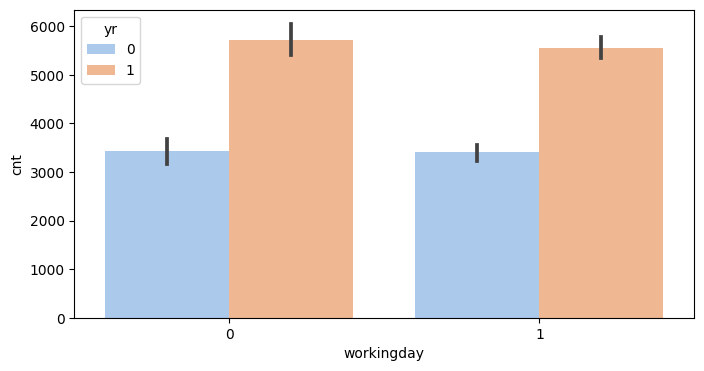

In [ ]:
# plotting visualization for workingday column

categorical_columns_plot('workingday')

### Correlation between Numerical Values

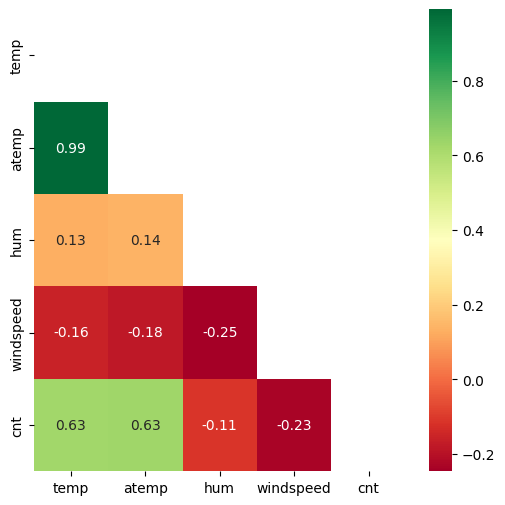

In [ ]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

# Data Preparation

In [ ]:
# Dummy variable creation for mnth, weekday, weathersit and season variables.

months=pd.get_dummies(df.mnth,drop_first=True)
weekdays=pd.get_dummies(df.weekday,drop_first=True)
weathersit=pd.get_dummies(df.weathersit,drop_first=True)
seasons=pd.get_dummies(df.season,drop_first=True)

In [ ]:
# Merge the df, with the above dummy dataset.

df = pd.concat([df,months,weekdays,weathersit,seasons],axis=1)

In [ ]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# dropping unnecessary cols as we have dummy variables

df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [ ]:
df.shape

(729, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              729 non-null    int64  
 1   holiday         729 non-null    int64  
 2   workingday      729 non-null    int64  
 3   temp            729 non-null    float64
 4   atemp           729 non-null    float64
 5   hum             729 non-null    float64
 6   windspeed       729 non-null    float64
 7   cnt             729 non-null    int64  
 8   aug             729 non-null    uint8  
 9   dec             729 non-null    uint8  
 10  feb             729 non-null    uint8  
 11  jan             729 non-null    uint8  
 12  july            729 non-null    uint8  
 13  june            729 non-null    uint8  
 14  mar             729 non-null    uint8  
 15  may             729 non-null    uint8  
 16  nov             729 non-null    uint8  
 17  oct             729 non-null    uin

In [ ]:
# splitting the df into Train and Test datasets
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [ ]:
df_train.shape

(510, 30)

In [ ]:
df_test.shape

(219, 30)

In [ ]:
# Using MinMaxScaler for Rescaling the features

scaler = MinMaxScaler()

In [ ]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
626,1,0,1,22.652500,27.02020,53.6667,14.416725,7591,0,0,...,0,0,1,0,0,0,0,0,0,0
364,0,0,1,16.810000,20.70605,61.5833,14.750318,2485,0,1,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
626,1,0,1,0.614763,0.635584,0.450242,0.371638,0.864421,0,0,...,0,0,1,0,0,0,0,0,0,0
364,0,0,1,0.437201,0.461603,0.552447,0.382342,0.247978,0,1,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.460736,0.559440,0.255342,0.438851,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.210280,0.381387,0.663106,0.164795,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.411155,0.389456,0.188475,0.457443,0,0,...,0,1,0,0,0,0,1,0,1,0


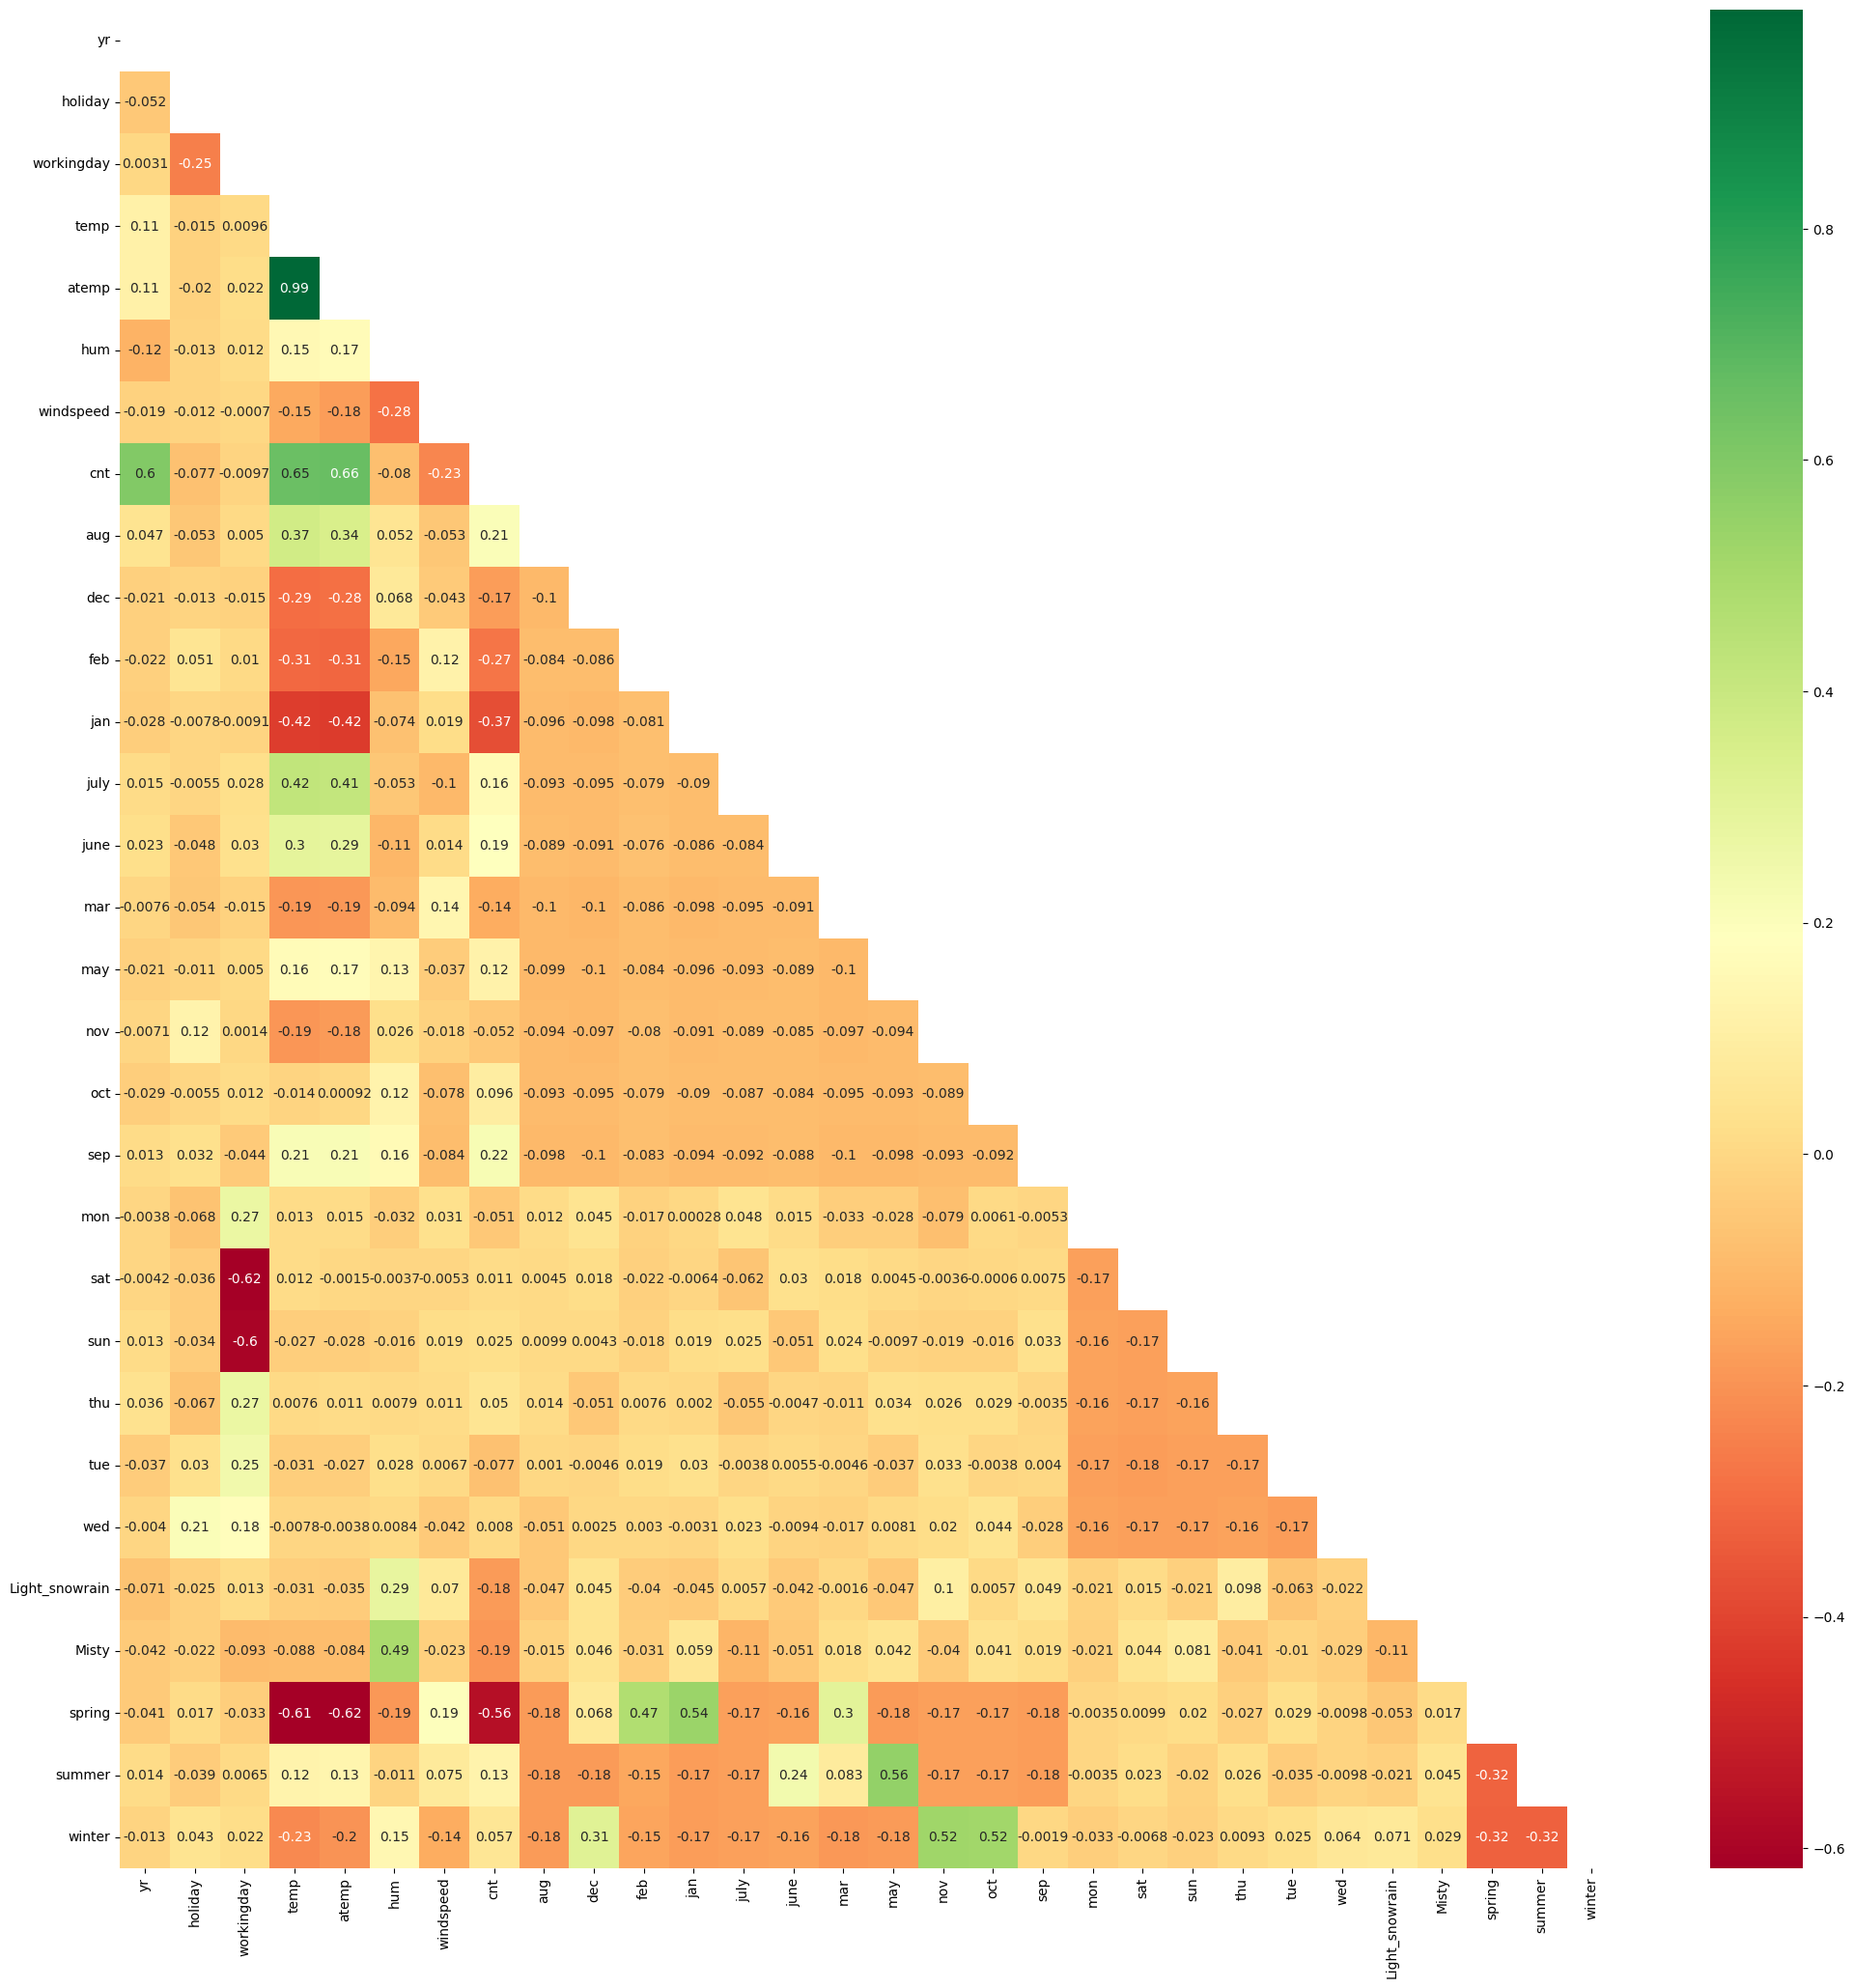

In [ ]:
# check the correlation coefficients to see correlation between variables

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

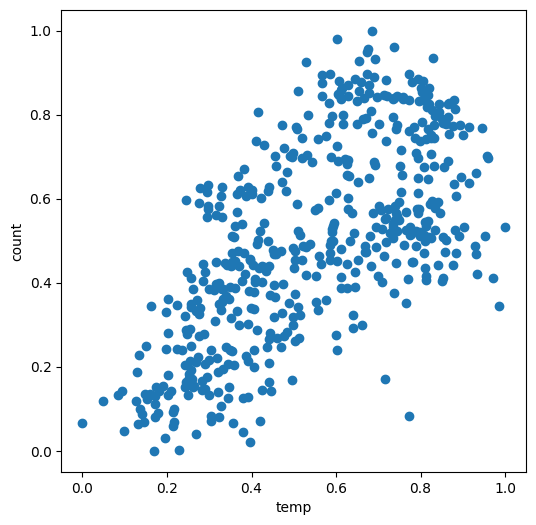

In [ ]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel('temp')
plt.ylabel('count')
plt.show()

In [ ]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:

#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', False, 2),
 ('july', False, 2),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

In [ ]:
#Print cols selected by RFE. We will start with these cols for manual elimination
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')

In [ ]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [ ]:
# dataframe with RFE selected variables

X_train_rfe = X_train[cols]

In [ ]:
X_train_rfe.shape

(510, 14)

## Building Linear Model

In [ ]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.48e-182
Time:                        15:39:29   Log-Likelihood:                 471.49
No. Observations:                 510   AIC:                            -913.0
Df Residuals:                     495   BIC:                            -849.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3647      0.082      4.

In [ ]:
# function to calculate VIF of variables

def calculateVIF(biker_data):
    vif = pd.DataFrame()
    vif['Features'] = biker_data.columns
    vif['VIF'] = [variance_inflation_factor(biker_data.values, i) for i in range(biker_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
calculateVIF(X_train_rfe)

,Features,VIF
4,atemp,365.74
3,temp,360.99
2,workingday,26.87
5,hum,21.01
8,sat,6.34
9,sun,6.01
6,windspeed,5.38
12,spring,3.19
11,Misty,2.50
13,winter,2.32


In [ ]:
# As humidity shows high VIF we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

calculateVIF(X_train_new)

,Features,VIF
4,atemp,362.52
3,temp,360.68
2,workingday,20.59
7,sat,5.16
5,windspeed,4.96
8,sun,4.90
11,spring,3.13
12,winter,2.24
0,yr,2.09
1,holiday,1.61


In [ ]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.93e-180
Time:                        15:39:29   Log-Likelihood:                 462.99
No. Observations:                 510   AIC:                            -898.0
Df Residuals:                     496   BIC:                            -838.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2945      0.082      3.

In [ ]:
# We can drop sun variable as it has high p-value
X_train_new = X_train_new.drop(['sun'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,temp,360.27
4,atemp,356.80
2,workingday,5.06
5,windspeed,4.19
0,yr,2.08
10,spring,1.97
7,sat,1.86
11,winter,1.59
9,Misty,1.51
6,sep,1.17


In [ ]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.66e-181
Time:                        15:39:29   Log-Likelihood:                 462.68
No. Observations:                 510   AIC:                            -899.4
Df Residuals:                     497   BIC:                            -844.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2353      0.027      8.

In [ ]:
# We can drop atemp variable as it has high p-value
X_train_new = X_train_new.drop(['atemp'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.28
2,workingday,5.03
4,windspeed,4.09
0,yr,2.08
9,spring,1.94
6,sat,1.86
10,winter,1.52
8,Misty,1.51
5,sep,1.17
1,holiday,1.16


In [ ]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.47e-182
Time:                        15:39:29   Log-Likelihood:                 462.31
No. Observations:                 510   AIC:                            -900.6
Df Residuals:                     498   BIC:                            -849.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2383      0.027      8.

In [ ]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,temp,5.00
4,windspeed,4.04
2,workingday,3.18
0,yr,2.08
8,spring,1.78
7,Misty,1.50
9,winter,1.42
5,sep,1.16
1,holiday,1.10
6,Light_snowrain,1.06


In [ ]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.66e-183
Time:                        15:39:29   Log-Likelihood:                 461.78
No. Observations:                 510   AIC:                            -901.6
Df Residuals:                     499   BIC:                            -855.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2304      0.026      8.

In [ ]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.230449
yr                0.243102
holiday          -0.098616
workingday       -0.025963
temp              0.449894
windspeed        -0.118127
sep               0.072501
Light_snowrain   -0.274784
Misty            -0.078998
spring           -0.122429
winter            0.053651
dtype: float64

## Residual Analysis of Training data

In [ ]:
y_train_pred = lr_5.predict(X_train_lm_5)

<ipython-input-832-7d66dd0d89f0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


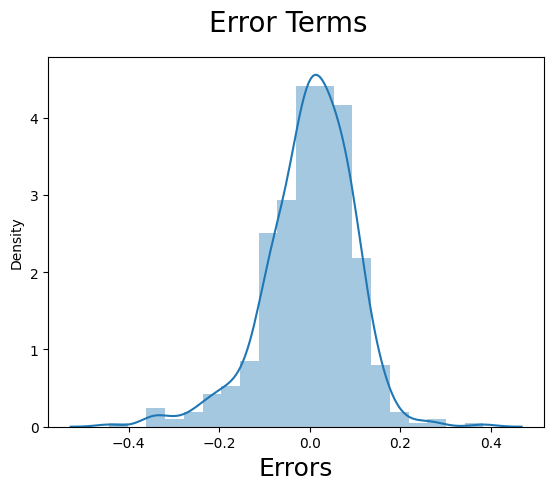

In [ ]:
# histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Model prediction using finalized params

In [ ]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
185,0,0,1,0.856704,0.850415,0.519634,0.180484,0.511167,0,0,...,0,0,1,0,0,0,0,0,0,0
639,1,0,1,0.662528,0.638242,0.882733,0.133655,0.508028,0,0,...,0,0,0,0,1,1,0,0,0,1
300,0,0,0,0.338555,0.330295,0.513716,0.402389,0.400338,0,0,...,0,1,0,0,0,0,1,0,0,1
222,0,0,0,0.820361,0.788671,0.304464,0.263333,0.526500,1,0,...,1,0,0,0,0,0,0,0,0,0
153,0,0,0,0.698871,0.699963,0.214632,0.453215,0.589279,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.031963,0.698630,0.551850,0.553801,0.562174,0.319257,0.484718,0.073059,0.063927,...,0.127854,0.146119,0.155251,0.127854,0.141553,0.041096,0.310502,0.251142,0.273973,0.237443
std,0.500513,0.176306,0.459904,0.235346,0.232749,0.179169,0.157824,0.227716,0.260830,0.245183,...,0.334692,0.354034,0.362974,0.334692,0.349389,0.198967,0.463759,0.434663,0.447017,0.426491
min,0.000000,0.000000,0.000000,0.046591,0.027237,0.131791,-0.042808,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336479,0.345502,0.427649,0.213225,0.330677,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.561806,0.576424,0.548144,0.303481,0.497042,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746636,0.729541,0.689408,0.400400,0.635156,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.983385,1.049574,1.012910,0.807474,0.941205,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [ ]:
y_pred = lr_5.predict(X_test_lm_6)
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8065

Text(0, 0.5, 'y_pred')

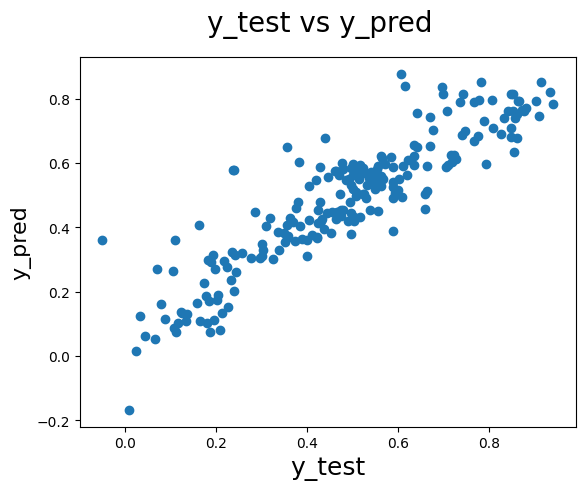

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [ ]:
round(lr_5.params,4)

const             0.2304
yr                0.2431
holiday          -0.0986
workingday       -0.0260
temp              0.4499
windspeed        -0.1181
sep               0.0725
Light_snowrain   -0.2748
Misty            -0.0790
spring           -0.1224
winter            0.0537
dtype: float64

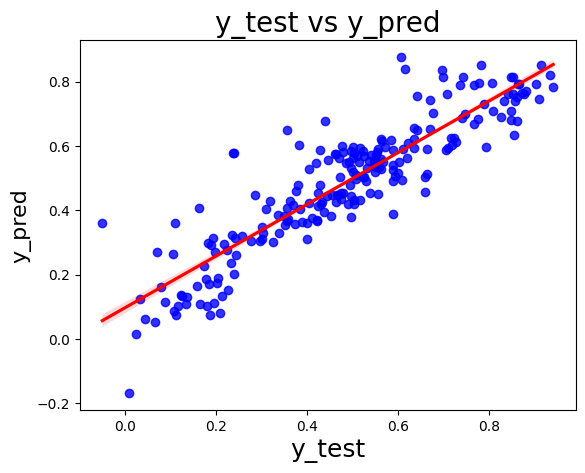

In [ ]:
# Visualizing the fit on the test data

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()